<a href="https://colab.research.google.com/github/Saeedaaman/GB/blob/main/MNIST_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pylab as plt
np.random.seed (123) # for reproducibility

In [2]:
#input image dimensions
img_x, img_y = 28, 28

#Load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# reshape the data into a 4D tensor:

# (sample_number, x_img_size, y_img_size, num_channels)

# because the MNIST is greyscale, we only have a single channel

# RGB colour images would have 3

x_train = x_train. reshape(x_train.shape [0], img_x, img_y, 1)

x_test = x_test.reshape(x_test.shape [0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)

In [4]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = to_categorical (y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 49s 102ms/step - loss: 0.1494 - accuracy: 0.9545
Epoch 2/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 3/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 6/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 7/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 8/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 9/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 10/10
469/469 [==============================] - 47s 100ms/step - loss: 

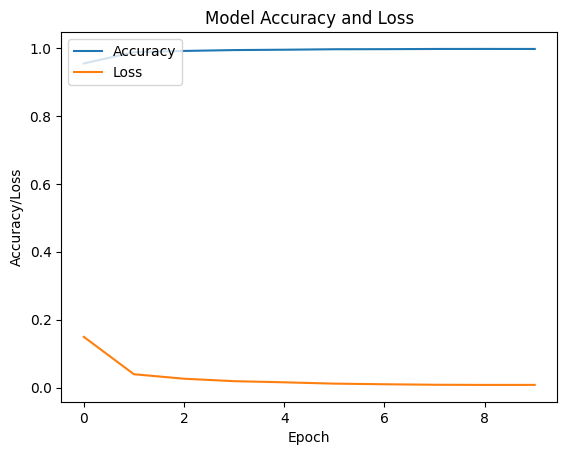

In [8]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend (['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034533217549324036
Test accuracy: 0.9898999929428101


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

datagen.fit(x_train)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2907 - accuracy: 0.9055
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1145 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0882 - accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0759 - accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0652 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0592 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0549 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0493 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0458 - accuracy: 0.9853
Epoch 10/10
1875/1875 [==============================] - 66s 35m

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07512453198432922
Test accuracy: 0.9768999814987183


(588, 1339, 3)


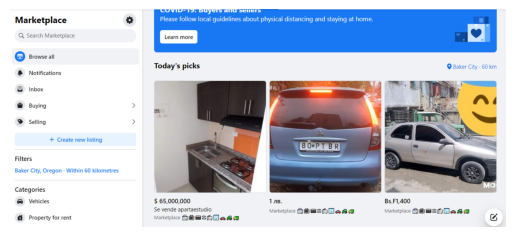

(1, 588, 1339, 3)


NotADirectoryError: ignored

In [17]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

image_path="/content/Capture.PNG"
img = cv2.imread (image_path, cv2. IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print (img.shape)
plt.imshow(img_rgb)
plt.axis ("off")
plt.show()

#Convert 3D Data to 4D: Add one dimensions
img_rgb = img_rgb.reshape((1,)+img_rgb.shape)
print(img_rgb.shape)

datagen = ImageDataGenerator (rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

i = 0
for batch in datagen.flow(img_rgb, save_to_dir='/content/Capture.PNG', save_prefix='Local_park', save_format='jpeg'):
  i += 1
  if i > 9:
    break
